In [1]:
import pandas as pd
data=pd.read_csv('information.csv',encoding = "ISO-8859-1")

In [2]:
data.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)


In [3]:
import matplotlib.pyplot as plt

In [4]:
data.groupby('_golden')['_unit_id'].count()

_golden
False    20000
True        50
Name: _unit_id, dtype: int64

<BarContainer object of 2 artists>

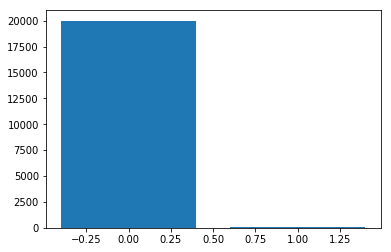

In [5]:
labels=[False,True]
values=[20000,50]
plt.bar(labels,values)
#plt.pie(labels,values)

In [6]:
#As per the pictorial view..the data is skewed 

In [7]:
data.groupby('gender')['_unit_id'].count()

gender
brand      5942
female     6700
male       6194
unknown    1117
Name: _unit_id, dtype: int64

<BarContainer object of 4 artists>

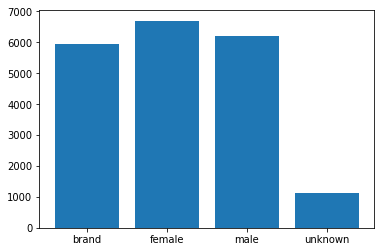

In [8]:
labels=['brand','female','male','unknown']
values=[5942,6700,6194,1117]
plt.bar(labels,values)

In [9]:
#gender is distributed almost evenly among female and males ..

c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.2000e+01, 1.8800e+02, 4.1000e+02,
        1.9700e+02, 4.3000e+01, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.8000e+01, 9.3000e+01, 3.8200e+02,
        9.0900e+02, 1.5280e+03, 1.3810e+03, 6.6400e+02, 1.6300e+02,
        1.4000e+01, 0.0000e+00, 0.0000e+00, 0.00

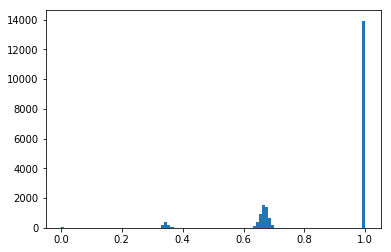

In [10]:
plt.hist(data['gender:confidence'],bins=100)

In [11]:
data.groupby('profile_yn')['_unit_id'].count()

profile_yn
no        97
yes    19953
Name: _unit_id, dtype: int64

In [12]:
def func(this):
    try:
        a= int(list(map(str,this.split(' ')))[0][-2:])
        return a
    except:
        try:
            return int(list(map(str,this.split(' ')))[0][-1:])
        except:
            return 0

data['created_year']=data['created'].apply(func)

In [13]:
def func(this):
    try:
        return len(this.split(' '))
    except:
        return 0

data['len_description']=data['description'].apply(func)

In [14]:
def func(this):
    try:
        return len(this.split(' '))
    except:
        return 0

data['len_text']=data['text'].apply(func)

In [15]:
def func(this):
    try:
        a= int(list(map(str,this.split(' ')))[0][-2:])
        return a
    except:
        try:
            return int(list(map(str,this.split(' ')))[0][-1:])
        except:
            return 0

data['last_trusted_year']=data['_last_judgment_at'].apply(func)

In [16]:
def func(this):
    try:
        a= int(list(map(str,this.split(' ')))[0][-2:])
        return a
    except:
        try:
            return int(list(map(str,this.split(' ')))[0][-1:])
        except:
            return 0

data['tweet_evaluated_year']=data['tweet_created'].apply(func)

In [17]:
data=data.drop(['tweet_location','profileimage','_last_judgment_at','_trusted_judgments','profile_yn','_unit_state','_unit_id','tweet_id','tweet_coord','user_timezone','sidebar_color','text','description'],axis=1)

In [18]:
data=data.drop(['created','gender_gold','link_color','name','profile_yn_gold'],axis=1)

In [19]:
data.head(2)

,_golden,gender,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_created,created_year,len_description,len_text,last_trusted_year,tweet_evaluated_year
0,False,male,1.0,1.0,0,0,110964,10/26/15 12:40,13,5,14,15,15
1,False,male,1.0,1.0,68,0,7471,10/26/15 12:40,12,11,19,15,15


In [20]:
data=data=data.drop(['tweet_created'],axis=1)

In [21]:
data.head(2)

,_golden,gender,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,created_year,len_description,len_text,last_trusted_year,tweet_evaluated_year
0,False,male,1.0,1.0,0,0,110964,13,5,14,15,15
1,False,male,1.0,1.0,68,0,7471,12,11,19,15,15


In [22]:
data['golden']=data['_golden'].map({True:0,False:1
})

In [23]:
data=data.drop(['_golden'],axis=1)

In [24]:
data['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [25]:
data.dropna(inplace=True,subset=['gender'],axis=0)

In [26]:
data.head(2)

,gender,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,created_year,len_description,len_text,last_trusted_year,tweet_evaluated_year,golden
0,male,1.0,1.0,0,0,110964,13,5,14,15,15,1
1,male,1.0,1.0,68,0,7471,12,11,19,15,15,1


In [27]:
data['gender']=data['gender'].map({'male':0,'female':1,'brand':2,'unknown':3
})

In [28]:
data['gender'].unique()

array([0, 1, 2, 3], dtype=int64)

In [29]:
index=data.index

In [30]:
col=list(data.columns.values)

In [31]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [32]:
y=data['gender']

In [33]:
x=data.drop(columns='gender')


In [34]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(x,y,test_size=0.3)

In [35]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [36]:
X=imputer.fit_transform(x)

In [37]:
X=data.astype(object)

In [38]:
X = pd.DataFrame(data = X,  
                  index = index,  
                  columns = col) 

In [39]:
X.head()

,gender,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,created_year,len_description,len_text,last_trusted_year,tweet_evaluated_year,golden
0,0,1,1,0,0,110964,13,5,14,15,15,1
1,0,1,1,68,0,7471,12,11,19,15,15,1
2,0,0.6625,1,7696,1,5617,14,6,16,15,15,1
3,0,1,1,202,0,1693,9,24,23,15,15,1
4,1,1,1,37318,0,31462,14,27,12,15,15,1


In [40]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,y,test_size=0.3)

In [41]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
model.score(X_train,Y_train)

1.0

In [45]:
predictions=model.predict(X_test)

In [57]:
pred=np.zeros(len(predictions))
for i in range(len(predictions)):
    pred[i]=int(round(predictions[i]))

In [58]:
type(Y_test)

pandas.core.series.Series

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,Y_test)

1.0

In [48]:
print(len(predictions))
print(len(Y_test))

5986
5986


In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [60]:
pre=clf.predict(X_test)
accuracy_score(pre,Y_test)

1.0

In [50]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier( random_state=0)

In [51]:
random.fit(X_train,Y_train)

c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
pre=random.predict(X_test)
accuracy_score(pre,Y_test)

0.9994988306047444

In [225]:
import statistics as sc
def ensemble(X):
    a=model.predict(X)
    b=clf.predict(X)
    c=random.predict(X)
    n=len(a)
    d=np.zeros(n)
    for i in range(n):
        d[i]=int(sc.mode([round(a[i]),round(b[i]),round(c[i])]))
    return d

    

    
    

In [226]:
y_values=ensemble(X_test)

In [230]:
from sklearn.metrics import accuracy_score

In [244]:
#accuracy calculation
accuracy_score(y_values,Y_test)

1.0

2 questions asked myself 

In [237]:
# Which gender makes more typos in their tweets?
data=pd.read_csv('information.csv',encoding = "ISO-8859-1")
from spellchecker import SpellChecker
s=SpellChecker()
def spell(this):
    try:
        
        m=s.unknown(this.rstrip().split(' '))
        return len(m)
    except:
        return 0

data['mistakes_desc']=data['text'].apply(spell)
    

In [240]:
mis_frequency_female=data['mistakes_desc'][data['gender']=='female'].sum()/len(data[data['gender']=='female'])
mis_frequency_male=data['mistakes_desc'][data['gender']=='male'].sum()/len(data[data['gender']=='male'])

In [241]:
mis_frequency_female

3.3492537313432837

In [242]:
mis_frequency_male

3.6096222150468193

In [243]:
#males make mistakes more often than females

In [245]:
sc.mode(data['sidebar_color'])

'C0DEED'

In [247]:
#Which is the mostly used color ?
#C0DEED
#C0DEED is Onahau